In [1]:
import pandas as pd

from os import listdir
from scipy.io import wavfile
from sklearn.model_selection import StratifiedShuffleSplit

%matplotlib inline

In [2]:
tmp1, tmp2 = wavfile.read('data/VCTK-Corpus/wav48/p239/p239_001.wav')

In [3]:
txts = 'data/VCTK-Corpus/txt/p239/'
wavs = 'data/VCTK-Corpus/wav48/p239/'

## Creating manifests

In [4]:
ids = [path[5:8] for path in listdir(wavs)]
lens = [len(wavfile.read(wavs + path)[1]) for path in listdir(wavs)]
lens = pd.Series(lens, ids)

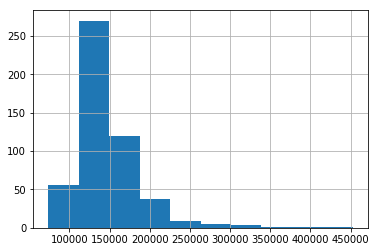

In [5]:
lens.hist();

In [6]:
lens = lens[lens <= 250000]

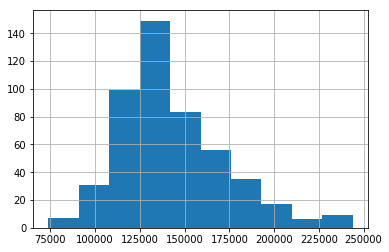

In [7]:
lens.hist();

In [8]:
X = lens.index
y = lens.values // 21150

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=0)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    
test = lens[lens.index.isin(X_test)]
train = lens[lens.index.isin(X_train)]

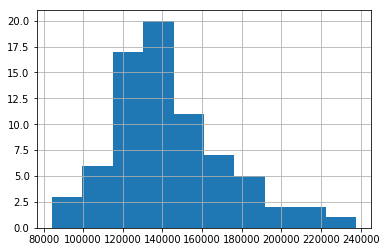

In [9]:
test.hist()

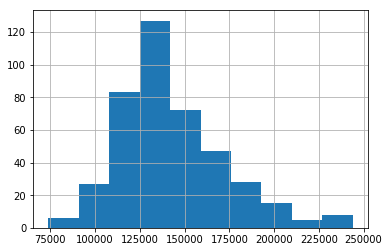

In [10]:
train.hist()

In [11]:
len(test), len(train)

(74, 418)

In [12]:
wav = lambda x: wavs + 'p239_{}.wav'.format(x)
txt = lambda x: txts + 'p239_{}.txt'.format(x)

def manifest(filename, ids):
    wav_files = [wav(i) for i in ids]
    txt_files = [txt(i) for i in ids]
    lines = ['{},{}\n'.format(fst, snd) for fst, snd in zip(wav_files, txt_files)]
    with open(filename, 'w') as f:
        f.writelines(lines)

In [13]:
manifest('test.csv', test.index)
manifest('train.csv', train.index)

In [15]:
! python repos/deepspeech.pytorch/train.py --train-manifest train.csv --val-manifest test.csv --epochs 1 --batch-size 2 --labels-path=repos/deepspeech.pytorch/labels.json

Model Save directory already exists.
DeepSpeech(
  (conv): Sequential(
    (0): Conv2d(1, 32, kernel_size=(41, 11), stride=(2, 2), padding=(0, 10))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True)
    (2): Hardtanh(min_val=0, max_val=20, inplace)
    (3): Conv2d(32, 32, kernel_size=(21, 11), stride=(2, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True)
    (5): Hardtanh(min_val=0, max_val=20, inplace)
  )
  (rnns): Sequential(
    (0): BatchRNN(
      (rnn): GRU(672, 800, bias=False, bidirectional=True)
    )
    (1): BatchRNN(
      (batch_norm): SequenceWise (
      BatchNorm1d(800, eps=1e-05, momentum=0.1, affine=True))
      (rnn): GRU(800, 800, bias=False, bidirectional=True)
    )
    (2): BatchRNN(
      (batch_norm): SequenceWise (
      BatchNorm1d(800, eps=1e-05, momentum=0.1, affine=True))
      (rnn): GRU(800, 800, bias=False, bidirectional=True)
    )
    (3): BatchRNN(
      (batch_norm): SequenceWise (
      BatchNorm1d(800, eps=1e-05, momen